# Лабораторна робота №4

## Завдання: Варіант 8

\begin{equation*}
\begin{cases}
13.1 x_1 + 9.2 x_2 = 173 \\
8.3 x_1 + 21 x_2 = 271 \\
3.2 x_1 - 8.3 x_2 = 34 \\
\end{cases}
\end{equation*}

### На окремих графіках:

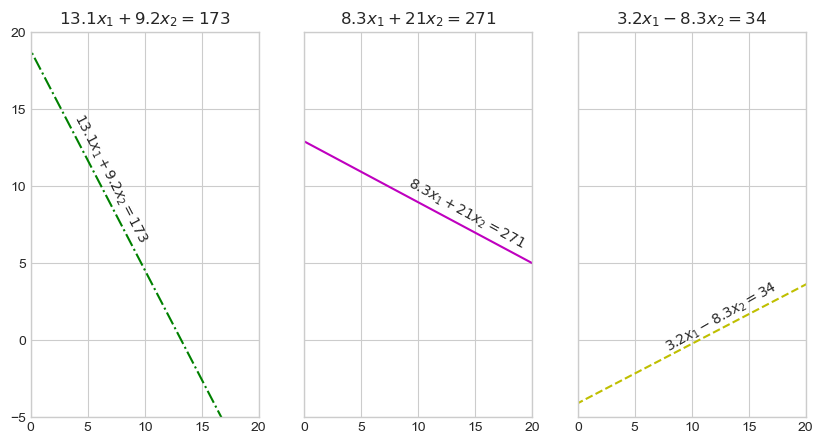

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import matplotlib.colors as mcolors

plt.style.use('seaborn-whitegrid')

eqs = ['$13.1x_1 + 9.2x_2 = 173$', '$8.3x_1 + 21x_2 = 271$', '$3.2x_1 - 8.3x_2 = 34$']

x_1 = np.linspace(-20, 25, 1000)

functs = [(173 - 13.1 * x_1)/9.2, (271 - 8.3 * x_1)/21, (-34 + 3.2 * x_1)/8.3]
fig, axes = plt.subplots(ncols=3, figsize=(10, 5))

# set limits
for i, ax_ in enumerate(axes):
    ax_.set(xlim=(0, 20), ylim=(-5, 20), title=eqs[i])

# Plot annotations
ann_locs = [
    (3.75, 14.5),
    (9, 10), 
    (8, -0.75)
]

rotations = [ -55, -22, 23 ]

for i in range(3):
    axes[i].text(*ann_locs[i], eqs[i], rotation=rotations[i], rotation_mode='anchor',transform_rotates_text=True)    

# remove marks from Y Axis
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

# display plots
axes[0].plot(x_1, functs[0], '-.g')
axes[1].plot(x_1, functs[1], '-m')
axes[2].plot(x_1, functs[2], '--y')

# save files
plt.savefig('equations.png')
plt.savefig('equations.jpg')
plt.savefig('equations.svg')

plt.show()

### На одному графіку

Для цього потрібно спочатку отримати перетини вказаних графіків:

In [35]:
matrices = [
    np.array([[13.1, 9.2],[8.3, 21]]),
    np.array([[8.3, 21],[3.2, -8.3]]),
    np.array([[13.1, 9.2],[3.2, -8.3]])
]
rhs = [
    np.array([173, 271]),
    np.array([271, 34]),
    np.array([173, 34])
]

solutions = [np.linalg.solve(matrices[i], rhs[i]) for i in range(len(matrices))]

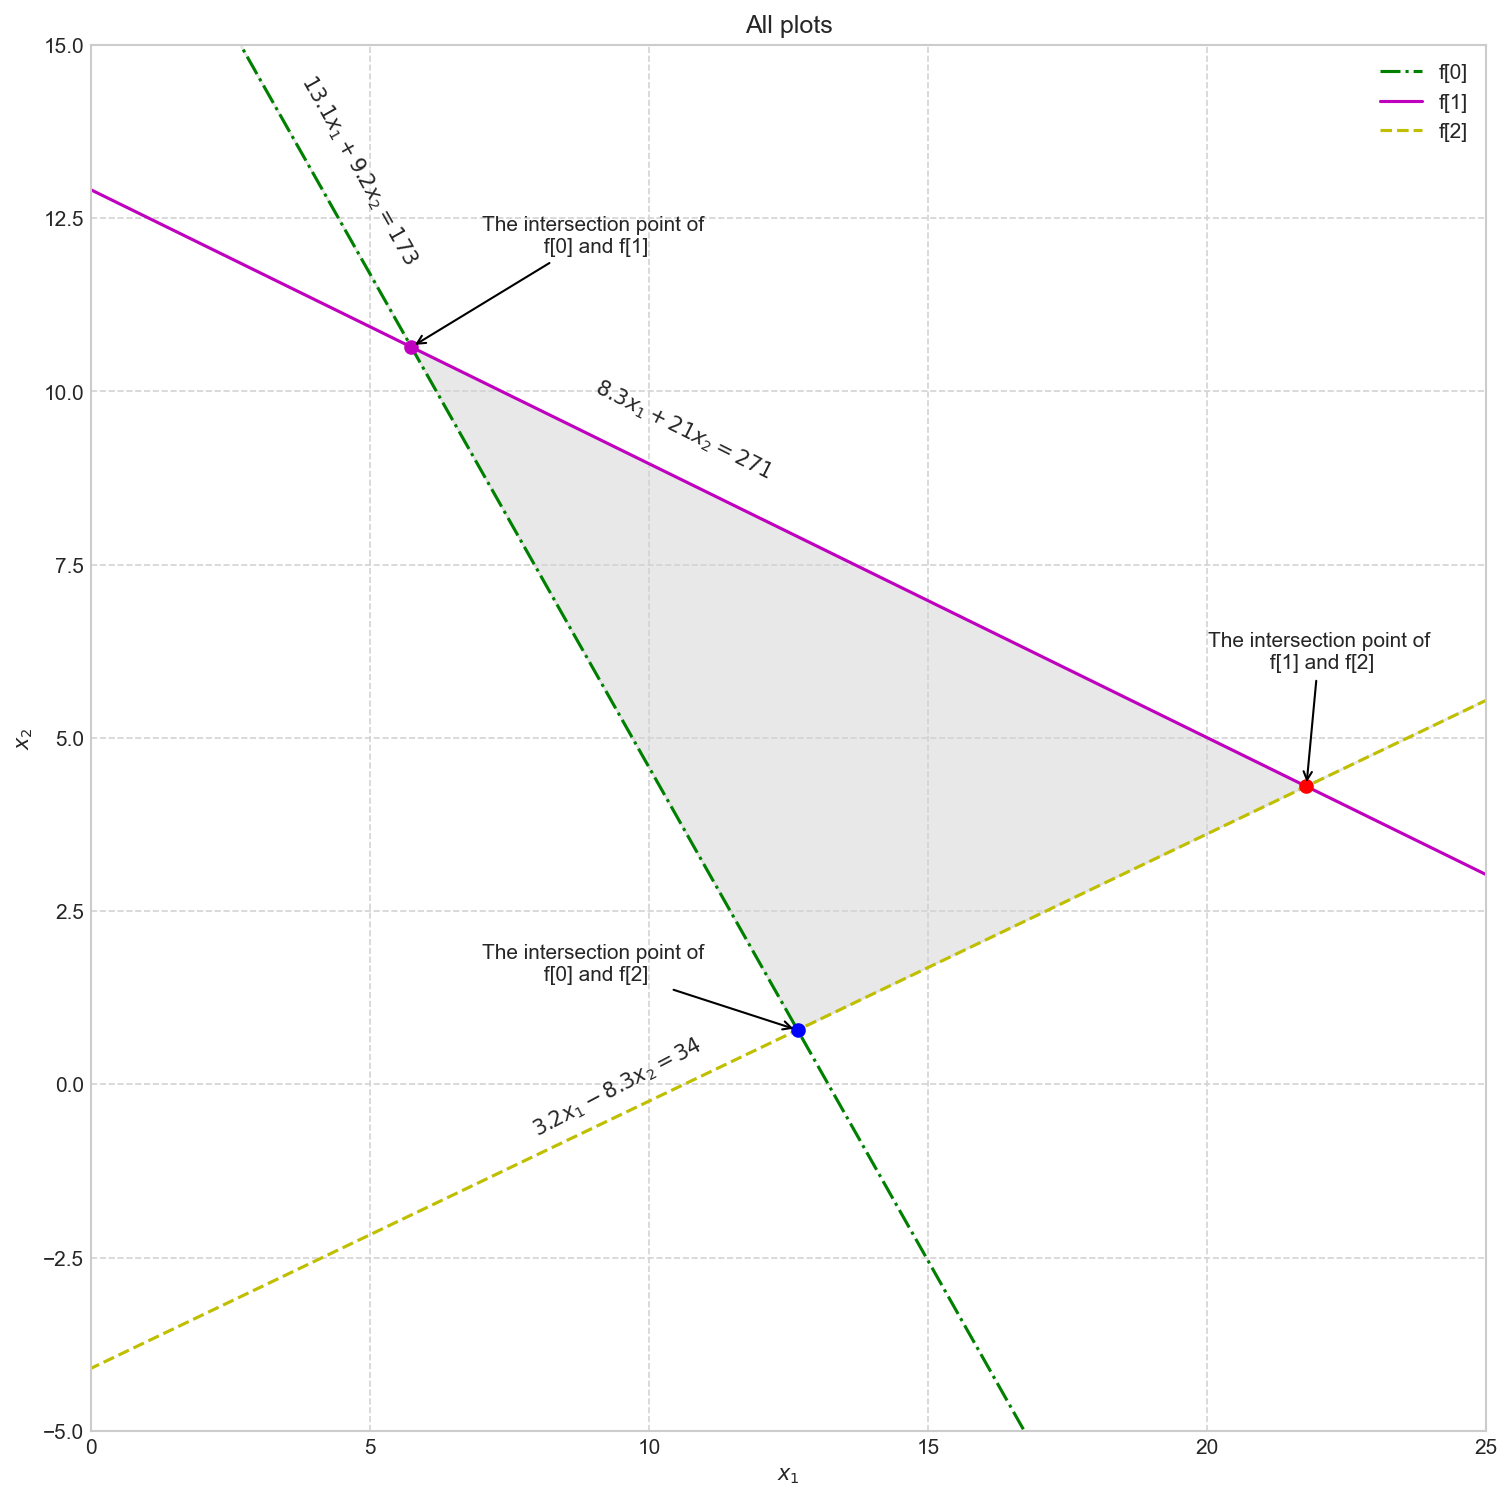

In [84]:
fig = plt.figure(figsize=(12, 12), dpi=150)
ax = plt.axes()
fig.add_axes(ax)
ax.set(xlim=(0, 25), ylim=(-5, 15), xlabel='$x_1$', ylabel='$x_2$', title='All plots')
ax.grid(linestyle='--', color='lightgrey')

ax.plot(x_1, functs[0], '-.g', label='f[0]')
ax.plot(x_1, functs[1], '-m', label='f[1]')
ax.plot(x_1, functs[2], '--y', label='f[2]')


for i, ax_ in enumerate(axes):
    ax.text(*ann_locs[i], eqs[i], rotation=rotations[i], rotation_mode='anchor',transform_rotates_text=True) 

ax.plot(*solutions[0], marker='o', color='m')
ax.plot(*solutions[1], marker='o', color='r')
ax.plot(*solutions[2], marker='o', color='b')

y = np.maximum(functs[0], functs[2])
y_1 = np.maximum(functs[1], y)
plt.fill_between(x_1, y, y_1, color='lightgrey', alpha=0.5)

ax.annotate(f"The intersection point of\n f[0] and f[1]", ha="center", xy=solutions[0], xytext=(9, 12), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"The intersection point of\n f[1] and f[2]", ha="center", xy=solutions[1], xytext=(22, 6), arrowprops=dict(arrowstyle="->"))
ax.annotate(f"The intersection point of\n f[0] and f[2]", ha="center", xy=solutions[2], xytext=(9, 1.5), arrowprops=dict(arrowstyle="->"))

ax.legend()

plt.savefig('equations.png')
plt.savefig('equations.jpg')
plt.savefig('equations.svg')

plt.show()